In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml
import numpy as np
#import torch
import wplotlib

The original network was trained by basicRegression.py<br>
here we load the trained network and use it<br>
   ---------------------------------------------------------

In [4]:
net = wuml.load_torch_network('./basicRegressionNet.pk')
data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
Ŷ = net(data)

Network Info:
	Learning rate: 0.001
	Max number of epochs: 500
	Cost Function: None
	Train Loop Callback: None
	Device type: 'cuda'
	Network Structure
		Linear(in_features=1, out_features=30, bias=True) , relu
		Linear(in_features=30, out_features=50, bias=True) , relu
		Linear(in_features=50, out_features=1, bias=True) , none



Check out our predictions

In [5]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
SR.true_vs_predict(print_out=True)

Mean Absolute Error: 0.5898


,y,ŷ,Δy
0,1.100000,1.102000,0.002000
1,1.100000,1.640000,0.540000
2,2.200000,1.640000,0.560000
3,1.000000,2.120000,1.120000
4,2.000000,2.120000,0.120000
5,3.000000,2.120000,0.880000
6,2.000000,2.914000,0.914000
7,3.000000,2.914000,0.086000
8,4.000000,2.914000,1.086000


,y,ŷ,Δy
0,1.100000,1.102000,0.002000
1,1.100000,1.640000,0.540000
2,2.200000,1.640000,0.560000
3,1.000000,2.120000,1.120000
4,2.000000,2.120000,0.120000
5,3.000000,2.120000,0.880000
6,2.000000,2.914000,0.914000
7,3.000000,2.914000,0.086000
8,4.000000,2.914000,1.086000


     y      ŷ     Δy
0  1.1  1.102  0.002
1  1.1  1.640  0.540
2  2.2  1.640  0.560
3  1.0  2.120  1.120
4  2.0  2.120  0.120
5  3.0  2.120  0.880
6  2.0  2.914  0.914
7  3.0  2.914  0.086
8  4.0  2.914  1.086

Draw the regression line

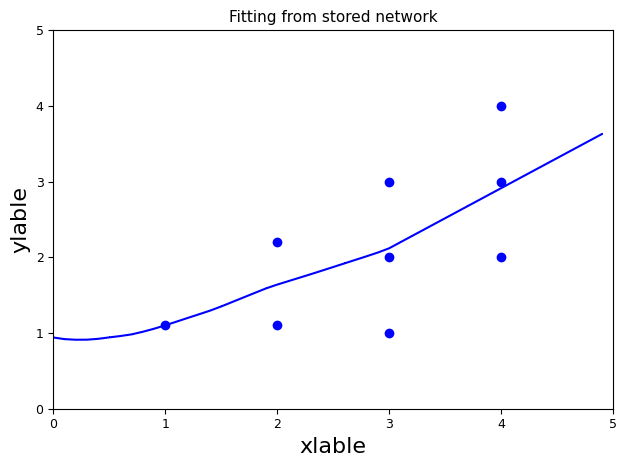

In [6]:
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷline = net(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False)
lp = wplotlib.lines(newX, Ŷline, title_font=11, title='Fitting from stored network', xlim=[0,5], ylim=[0,5], show=True)	

   ---------------------------------------------------------

The original network was trained by complexNet.py<br>
here we load the trained network and use it<br>
   ---------------------------------------------------------

In [7]:
data = wuml.wData(xpath='../../data/wine.csv', ypath='../../data/wine_label.csv', 
					extra_data='../../data/wine_regress_label.csv', 
					preprocess_data='center and scale', 
					 batch_size=16, label_type='discrete')
Y2 = data.extra_data_dictionary['numpy'][0]

In [8]:
net = wuml.load_torch_network('./ComplexNet.pk')
[labels, ŷᵦ] = net(data)

All Networks
	Batch size: 32: 
	Learning rate: 0.001
	Max number of epochs: 500
	Cost Function: costFunction
	Device type: 'cuda'
	Networks 0 Structure
		Linear(in_features=13, out_features=100, bias=True) , relu
		Linear(in_features=100, out_features=3, bias=True) , none
	Networks 1 Structure
		Linear(in_features=3, out_features=50, bias=True) , relu
		Linear(in_features=50, out_features=1, bias=True) , none



output results

In [9]:
CR = wuml.summarize_classification_result(data.Y, labels)
SR = wuml.summarize_regression_result(Y2, ŷᵦ)
#    ---------------------------------------------------------

Classification Accuracy: 0.7753


,y,ŷ,Δy
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,2.000000,2.000000
3,0.000000,0.000000,0.000000
4,0.000000,2.000000,2.000000
5,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000
7,0.000000,2.000000,2.000000
8,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000


Mean Absolute Error: 0.0805


,y,ŷ,Δy
0,-0.970000,-0.928000,0.042000
1,-16.930000,-16.873000,0.055000
2,13.650000,13.634000,0.015000
3,4.960000,5.040000,0.079000
4,25.400000,25.333000,0.072000
5,0.160000,0.234000,0.072000
6,1.440000,1.513000,0.075000
7,11.060000,11.008000,0.048000
8,-12.000000,-11.904000,0.097000
9,-12.010000,-11.941000,0.073000


The original network was trained by autoencoder.py<br>
here we load the trained network and use it<br>
   ---------------------------------------------------------

In [10]:
data = wuml.wData(xpath='../../data/wine.csv', ypath='../../data/wine_label.csv', 
					preprocess_data='center and scale', batch_size=128, label_type='discrete')

In [11]:
AE = wuml.load_torch_network('./autoencoder.pk')
#	This is the objective network output 
ẙ = AE.objective_network(data)

Autoencoder Info:
	Learning rate: 0.001
	Max number of epochs: 2000
	Cost Function: None
	Device type: 'cuda'
	Encoder Structure
		Linear(in_features=13, out_features=12, bias=True) , none
	Encoder Extra Output weight Structure
		Linear(in_features=12, out_features=3, bias=True) , none
	Encoder Structure
		Linear(in_features=12, out_features=13, bias=True) , none



Here we use the objective network output to perform LogisticRegression classification

In [12]:
cf = wuml.classification(ẙ, classifier='LogisticRegression')
wuml.jupyter_print(cf.result_summary(print_out=False))

,classifier,Train,Test
,LogisticRegression,1.0,1.0


   ---------------------------------------------------------